# LangGraphの`create_react_agent`関数について
* ツールの呼び出しを伴うAIエージェント作成用関数


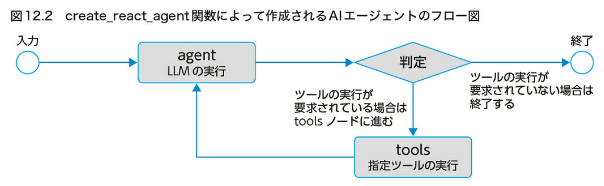

In [1]:
from IPython.display import Image
Image("/content/drive/MyDrive/for_study_in_library/study_LangGraph/png/creaet_react_agent.png")

In [1]:
# !pip install langchain-core==0.3.0 langchain-community==0.3.0 \
# langgraph==0.2.22 langchain-openai==0.2.0 langchain-anthropic==0.2.0 \
# numpy==1.26.4 faiss-cpu==1.8.0.post1 \
# pydantic-settings==2.5.2 retry==0.9.2 decorator==4.4.2

In [2]:
# !pip install "pydantic<2.11"  # 例: 2.10.6 エラー回避用

In [3]:
from dotenv import load_dotenv
load_dotenv()

In [4]:
# import os

# os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
# os.environ["LANGCHAIN_PROJECT"] = LANGCHAIN_PROJECT
# os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY

* LangChainの機能（@toolデコレータ）によりAIエージェントが利用可能なツールとして定義した`chech_weather`関数を実行するエージェント

In [5]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent

In [7]:
@tool
def check_weather(location: str) -> str:
    """現在の天気を返すツール"""
    return f"{location}は晴れています"

tools = [check_weather]
llm = ChatOpenAI(temperature=0)
graph = create_react_agent(llm, tools)

inputs = {"messages": [HumanMessage(content="今の東京の天気は？")]}

for state in graph.stream(inputs, stream_mode="values"):
    message = state["messages"][-1]
    message.pretty_print()

================================ Human Message =================================

今の東京の天気は？
================================== Ai Message ==================================
Tool Calls:
  check_weather (call_hdmC3LhTem92hzZPDEcDwGRw)
 Call ID: call_hdmC3LhTem92hzZPDEcDwGRw
  Args:
    location: Tokyo
================================= Tool Message =================================
Name: check_weather

Tokyoは晴れています
================================== Ai Message ==================================

東京は現在晴れています。


* stream_modeを`values`に設定すると、ステートが更新されるたびに、ステートの情報全体がfor文のイテレーション変数（ここではstate変数）に渡される。また、`updates`に設定すると、ノードが更新した値のみがイテレーション変数に渡される。  

* `create_react_agent`関数によって作成されるAIエージェントは、ステートとして`messages`フィールドを持っており、このフィールドはAIエージェントによる実行結果をすべて蓄積する設計になっている